# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.


Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

* Age of patient at time of operation (numerical) - age
* Patient's year of operation (year - 1900, numerical) - op_year
* Number of positive axillary nodes detected (numerical) - axil_nodes
* Survival status (class attribute) - surv_status

    1 = the patient survived 5 years or longer
    
    2 = the patient died within 5 year
    
    
#### Objective: Classify that a patient survived 5 years or longer, or died within 5 year

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
haberman = pd.read_csv("..\data\haberman\haberman.csv", header=None, names=['age', 'Op_Year', 'axil_nodes', 'Surv_status'])

In [3]:
# Number of points and features

print("These are the number of data-points and features ", haberman.shape)

These are the number of data-points and features  (306, 4)


In [4]:
haberman.head()

,age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
haberman.columns = map(str.lower, haberman.columns)
print("These are columns name",  haberman.columns)

These are columns name Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


In [6]:
# Number of classes
# Data-point per class

haberman['surv_status'].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

In [7]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op_year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# 2-D scatter plot



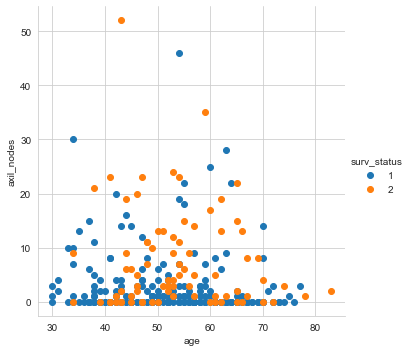

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue="surv_status", height=5) \
    .map(plt.scatter, 'age', 'axil_nodes') \
    .add_legend();
plt.show();

#### Observation(s):
1. Using age and axil_nodes features, we can distinguish survival after five years from other most especially when age is between 30-40 or 50-60
2. Considering age in the range of 40-50, it is hard to distinguish

# Pair-plot

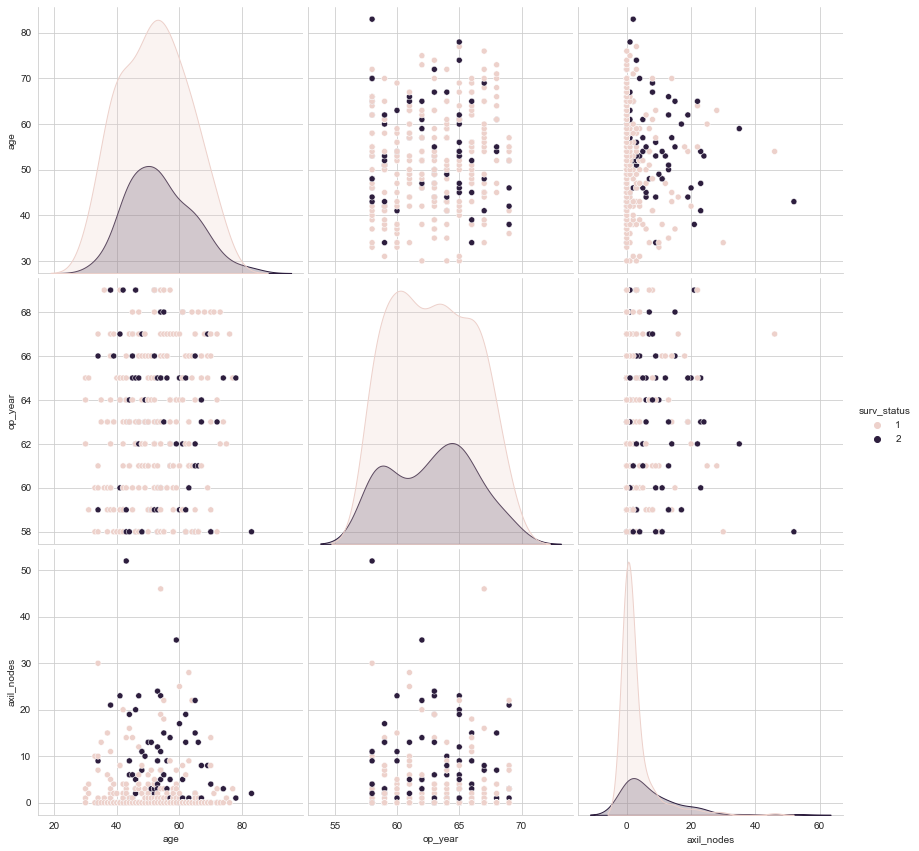

In [9]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue='surv_status', height=4);
plt.show()

### Observations

1. Age and positive axillary nodes detected are the most useful features to determined if patient survised
2. axil_nodes and op_years overlaped and also op_year and age

# Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)

## Histogram, PDF, CDF

In [10]:
survived_5yr = haberman[haberman["surv_status"] == 1];
not_survived_5yr = haberman[haberman["surv_status"] == 2];

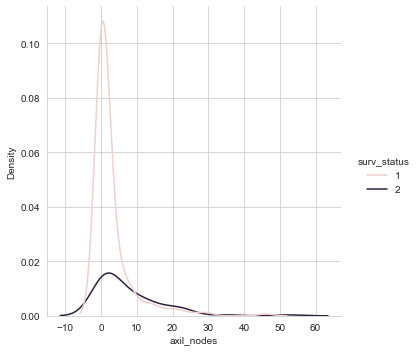

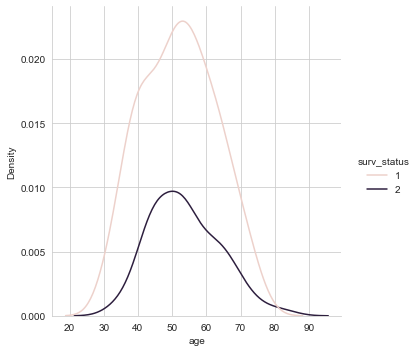

In [11]:

sns.displot(data=haberman, x='axil_nodes', hue='surv_status', kind='kde')
sns.displot(data=haberman, x='age', hue='surv_status', kind='kde')

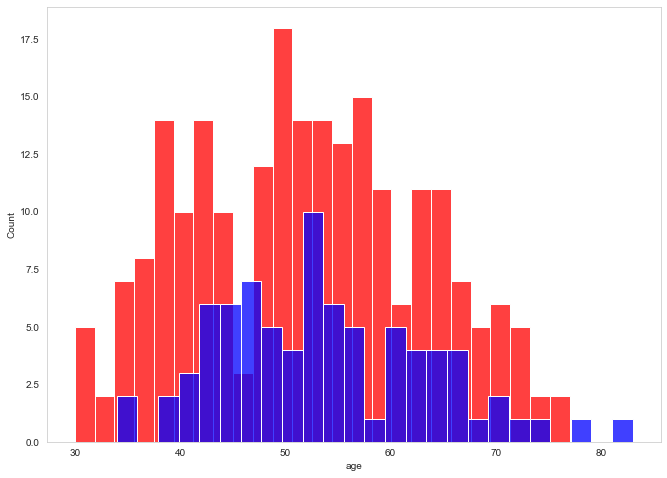

In [12]:

plt.figure(figsize = (11, 8))
sns.histplot(survived_5yr['age'], bins = 25, color = 'red')

sns.histplot(not_survived_5yr['age'], bins = 25, color = 'blue')
plt.grid()

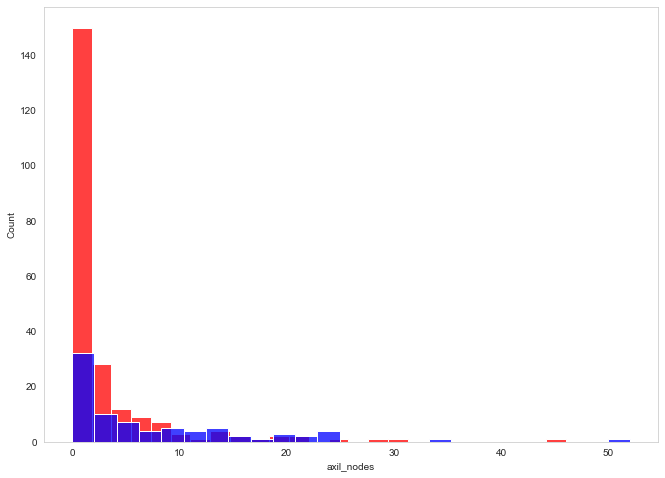

In [13]:
plt.figure(figsize = (11, 8))
sns.histplot(survived_5yr['axil_nodes'], bins = 25, color = 'red')

sns.histplot(not_survived_5yr['axil_nodes'], bins = 25, color = 'blue')
plt.grid()

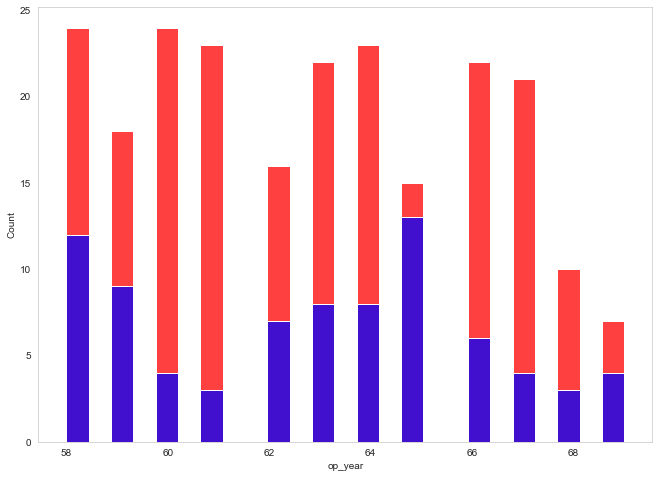

In [14]:
plt.figure(figsize = (11, 8))
sns.histplot(survived_5yr['op_year'], bins = 25, color = 'red')

sns.histplot(not_survived_5yr['op_year'], bins = 25, color = 'blue')
plt.grid()

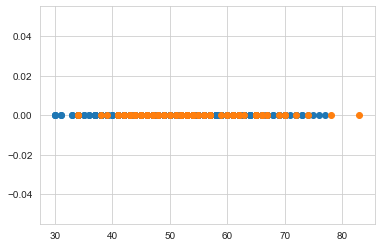

In [15]:
plt.plot(survived_5yr['age'], np.zeros_like(survived_5yr['age']), 'o')
plt.plot(not_survived_5yr['age'], np.zeros_like(not_survived_5yr['age']), 'o')

plt.show()

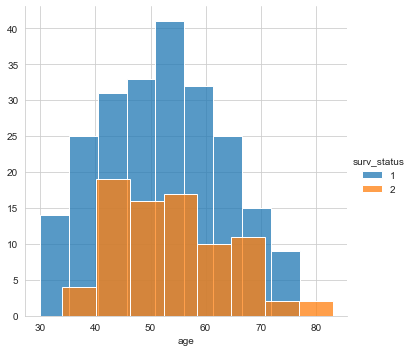

In [16]:
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(sns.histplot, "age") \
   .add_legend();
plt.show();

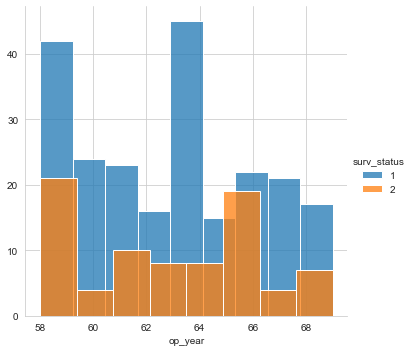

In [17]:
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(sns.histplot, "op_year") \
   .add_legend();
plt.show();

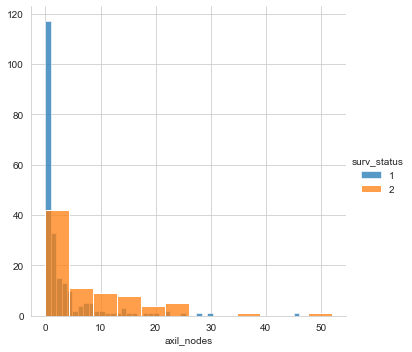

In [18]:
sns.FacetGrid(haberman, hue="surv_status", height=5) \
   .map(sns.histplot, "axil_nodes") \
   .add_legend();
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


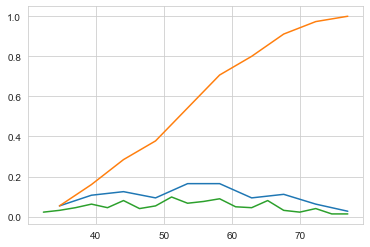

In [19]:
counts, bin_edges = np.histogram(survived_5yr['age'], bins=10, density =True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survived_5yr['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


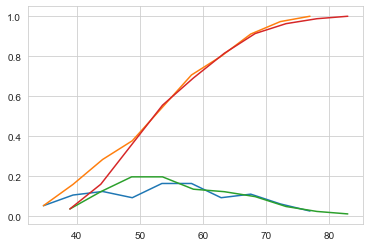

In [20]:
counts, bin_edges = np.histogram(survived_5yr['age'], bins=10, density =True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived_5yr['age'], bins=10, density =True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

plt.show();

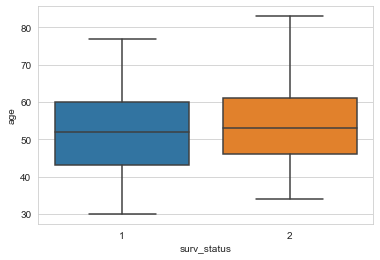

In [21]:
sns.boxplot(x='surv_status', y='age', data=haberman)

plt.show()


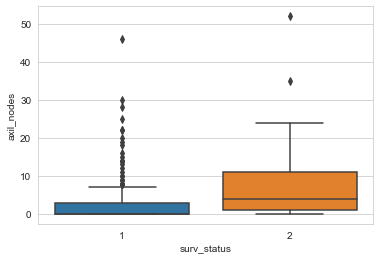

In [22]:
sns.boxplot(x='surv_status', y='axil_nodes', data=haberman)

plt.show()

<AxesSubplot:xlabel='surv_status', ylabel='op_year'>

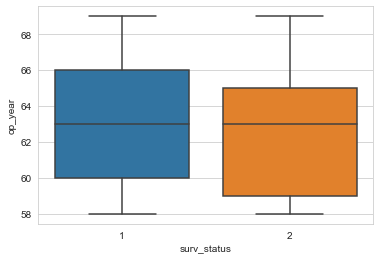

In [23]:
sns.boxplot(x='surv_status', y='op_year', data=haberman)

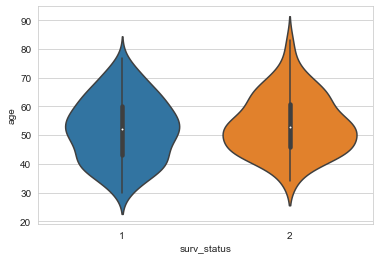

In [24]:
sns.violinplot(x="surv_status", y="age", data=haberman, size=8)
plt.show()

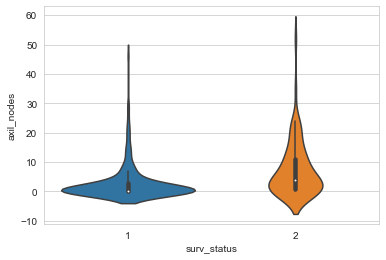

In [25]:
sns.violinplot(x="surv_status", y="axil_nodes", data=haberman, size=8)
plt.show()

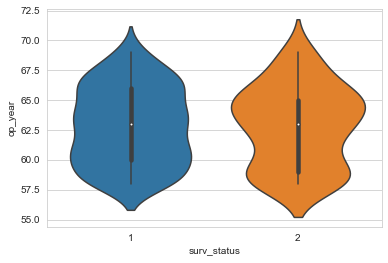

In [26]:
sns.violinplot(x="surv_status", y="op_year", data=haberman, size=8)
plt.show()

# (3.11) Multivariate probability density, contour plot.


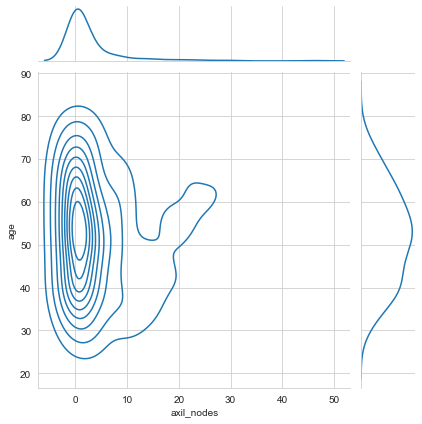

In [27]:
#2D Density plot, contors-plot
sns.jointplot(x="axil_nodes", y="age", data=survived_5yr, kind="kde");
plt.show();

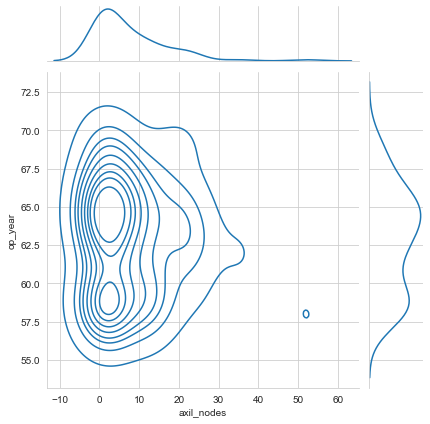

In [28]:
sns.jointplot(x="axil_nodes", y="op_year", data=not_survived_5yr, kind="kde");
plt.show();